In [1]:
import gym
import numpy as np
import random

def train_qtable(num_episodes, slippery, deterministic):
    
    env = gym.make("FrozenLake-v1", is_slippery=slippery)
    env.reset()

    gamma = 0.9
    alpha = 0.5
    max=1000
    total_episodes = num_episodes
    qtable = np.zeros((16,4))
    rewards = []

    for _ in range(total_episodes):

        state = env.reset()
        done = False
        while not done:

            # picks the best possible action in current state
            if np.max(qtable[state]) > 0:
                action = np.argmax(qtable[state])

            else:
                # if there are no options, picks a random action from 0 to 3
                action = random.randint(0, 3)
            
            # makes an action
            new_state, reward, done, info = env.step(action)

            # updates the qtable according to reward
            # the rule used is defined by deterministic == True or False
            if deterministic == True:  
                qtable[state, action] = reward + gamma*(np.max(qtable[new_state]))
            else:
                qtable[state, action] = qtable[state, action] + alpha * (reward + gamma*np.max(qtable[new_state]) - qtable[state, action])

            state = new_state
            
            # if reward is found, appends it to a list
            if reward:
                rewards.append(reward)

            if done == True:
                break
    #print("qtable after training \n", qtable)
    #returns the mean rewards
    return sum(rewards)/num_episodes

qtable after training 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Average reward for 25 episodes is 0.0
qtable after training 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Average reward for 50 episodes is 0.0
qtable after training 
 [[0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.81 0.  ]
 [0.   0.9  0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.   0.   0.  ]]
A

<function matplotlib.pyplot.show(*args, **kw)>

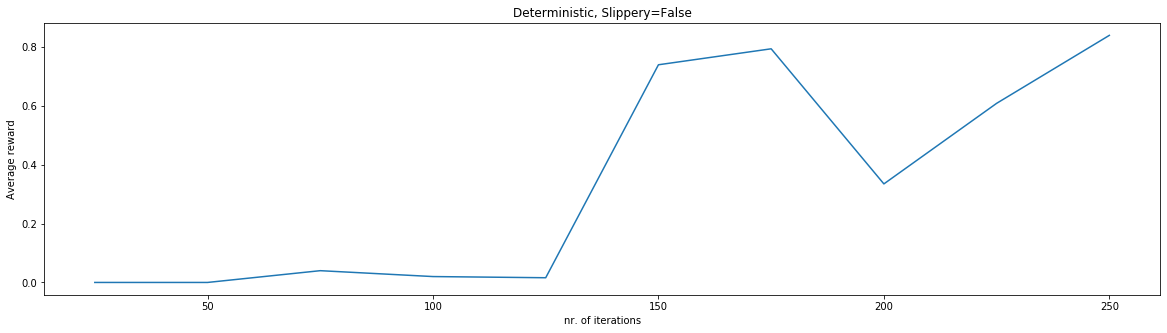

In [5]:
import matplotlib.pyplot as plt
iterations = 25
results = {}
for i in range(10):
    average_reward = train_qtable(iterations, slippery=False, deterministic=True)
    print("Average reward for",iterations,"episodes is", average_reward)
    results[iterations] = average_reward
    iterations +=25
    
names = list(results.keys())
values = list(results.values())

plt.figure(figsize=(20,5))
plt.plot(names, values)
plt.ylabel("Average reward")
plt.xlabel("nr. of iterations")
plt.title("Deterministic, Slippery=False")
plt.show

qtable after training 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Average reward for 25 episodes is 0.0
qtable after training 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Average reward for 50 episodes is 0.0
qtable after training 
 [[0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.  

<function matplotlib.pyplot.show(*args, **kw)>

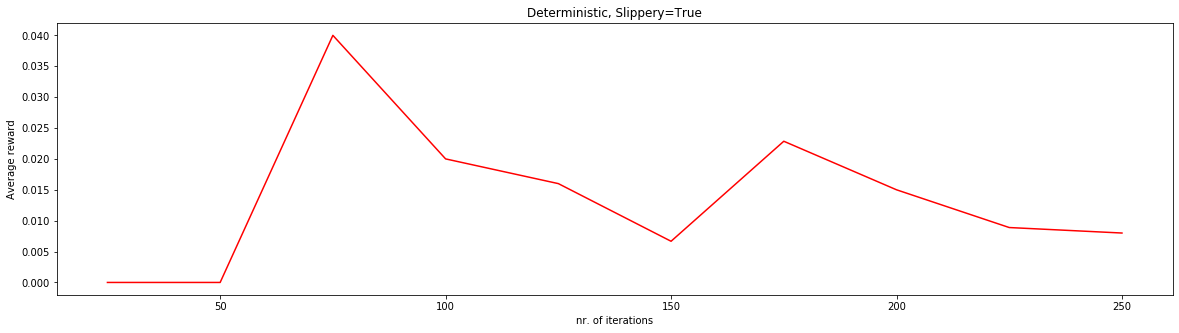

In [3]:
iterations = 25
results = {}
for i in range(10):
    average_reward = train_qtable(iterations, slippery=True,deterministic=True)
    print("Average reward for",iterations,"episodes is", average_reward)
    results[iterations] = average_reward
    iterations +=25
    
names = list(results.keys())
values = list(results.values())

plt.figure(figsize=(20,5))
plt.plot(names, values, "r-")
plt.ylabel("Average reward")
plt.xlabel("nr. of iterations")
plt.title("Deterministic, Slippery=True")
plt.show

qtable after training 
 [[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0. ]]
Average reward for 25 episodes is 0.04
qtable after training 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Average reward for 50 episodes is 0.0
qtable after training 
 [[0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.091125  0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.4303125 0.        0.       ]
 [0.

<function matplotlib.pyplot.show(*args, **kw)>

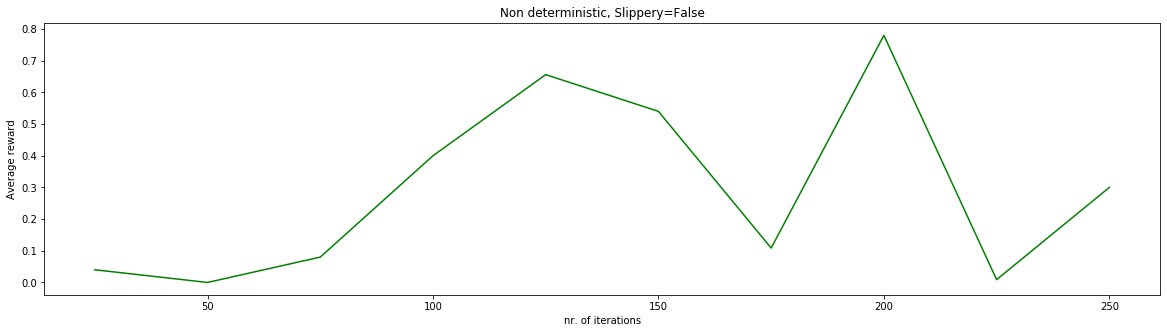

In [4]:
import matplotlib.pyplot as plt
iterations = 25
results = {}
for i in range(10):
    average_reward = train_qtable(iterations, slippery=False,deterministic=False)
    print("Average reward for",iterations,"episodes is", average_reward)
    results[iterations] = average_reward
    iterations +=25
    
names = list(results.keys())
values = list(results.values())

plt.figure(figsize=(20,5))
plt.plot(names, values, "g-")
plt.ylabel("Average reward")
plt.xlabel("nr. of iterations")
plt.title("Non deterministic, Slippery=False")
plt.show